# Q1

(10000,)
10 orders, expected profit of  910.0
(10000,)
20 orders, expected profit of  1820.0
(10000,)
30 orders, expected profit of  2730.0
(10000,)
40 orders, expected profit of  3640.0
(10000,)
50 orders, expected profit of  4549.94
(10000,)
60 orders, expected profit of  5457.82
(10000,)
70 orders, expected profit of  6316.4
(10000,)
80 orders, expected profit of  6920.9
(10000,)
90 orders, expected profit of  7112.76
(10000,)
100 orders, expected profit of  7096.71
(10000,)
110 orders, expected profit of  7015.23
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)


<AxesSubplot:>

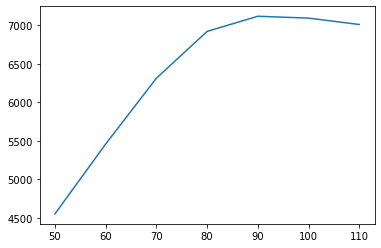

In [3]:
import numpy as np
jacketCost=54
jacketSellingPrice=145
endSeasonPrice=45
demandRate=80
def expectedProfit(ordered):
    demand=np.random.poisson(lam=demandRate,size=10000)
    print(demand.shape)
    sales=np.minimum(demand,ordered)
    returned=ordered-sales
    profit=sales*jacketSellingPrice-ordered*jacketCost+returned*endSeasonPrice
    return profit.mean()

for o in range(10,120,10):
    print(o,"orders, expected profit of ",expectedProfit(o))
    
import seaborn as sn
os=list(range(50,120,10))
ps=[expectedProfit(o) for o in os]
sn.lineplot(x=os,y=ps)

# Q2

average time in the office 21.41823556309279
std of time in the office 9.157473246295705
prob of waiting more than 30 minutes 0.13787


<AxesSubplot:ylabel='Probability'>

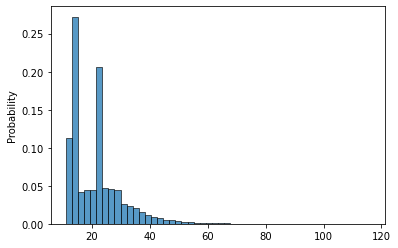

In [4]:
#fix question
arrivalTime=[]
startNurse=[]
finishNurse=[]
startDoctor=[]
finishDoctor=[]


for i in range(100000):
    if i>0:
        arrivalTime.append(arrivalTime[i-1]+np.random.exponential(20))
    else:
        arrivalTime.append(np.random.exponential(1/25))
    if i>0:
        startNurse.append(np.maximum(arrivalTime[i],finishNurse[i-1]))
    else:
        startNurse.append(arrivalTime[i])
    finishNurse.append(startNurse[i]+7)
    if i>0:
        startDoctor.append(np.maximum(finishNurse[i],finishDoctor[i-1]))
    else:
        startDoctor.append(finishNurse[i])
    finishDoctor.append(startDoctor[i]+np.random.choice([4,8,15],p=[0.2,0.5,0.3]))

finishDoctor=np.array(finishDoctor)
arrivalTime=np.array(arrivalTime)
timeInOffice=finishDoctor-arrivalTime
print("average time in the office",timeInOffice.mean())
print("std of time in the office",timeInOffice.std())
print("prob of waiting more than 30 minutes",np.where(timeInOffice>30,1,0).mean())
sn.histplot(timeInOffice,stat="probability",bins=50)


# Q3

In [71]:
def averageCost(R):
    Inventory=25
    lastOrder=-5 #no order pending
    orderingCost=0
    inventoryCost=0
    backorderCost=0
    Q=25
    periods=10000
    for period in range(periods):
        if lastOrder==(period-2): #order arrived
            Inventory+=25
        customers=np.random.choice([0,1,2,3,4],p=[0.1,0.3,0.25,0.2,0.15])
        if customers>0:
            totalDemand=np.random.choice([1,2,3,4],p=[0.1,0.15,0.4,0.35],size=customers).sum()
            Inventory-=totalDemand
        if Inventory>0:
            inventoryCost+=Inventory*1
        elif Inventory<0:
            backorderCost+=-Inventory*5
        if Inventory<=R and lastOrder<period-1:
            lastOrder=period
            orderingCost+=45

    return (inventoryCost+backorderCost+orderingCost)/periods

for R in range(1,20):
    print ("Reorder limit",R,"AverageCost",averageCost(R))    

Reorder limit 1 AverageCost 29.9363
Reorder limit 2 AverageCost 27.962
Reorder limit 3 AverageCost 27.2652
Reorder limit 4 AverageCost 26.0949
Reorder limit 5 AverageCost 25.1834
Reorder limit 6 AverageCost 24.849
Reorder limit 7 AverageCost 24.6659
Reorder limit 8 AverageCost 24.3447
Reorder limit 9 AverageCost 24.3869
Reorder limit 10 AverageCost 24.6178
Reorder limit 11 AverageCost 24.9684
Reorder limit 12 AverageCost 25.5233
Reorder limit 13 AverageCost 26.0147
Reorder limit 14 AverageCost 26.6504
Reorder limit 15 AverageCost 27.4388
Reorder limit 16 AverageCost 28.2769
Reorder limit 17 AverageCost 29.0277
Reorder limit 18 AverageCost 29.9567
Reorder limit 19 AverageCost 30.8639


# Q4

processing A
processing B
failed to process C ['B', 'D'] {'D'}
processing D
processing E
failed to process F ['C', 'E'] {'C'}
processing C
processing F
average time 26.2207
probability to exheed 27 0.334


<AxesSubplot:ylabel='Probability'>

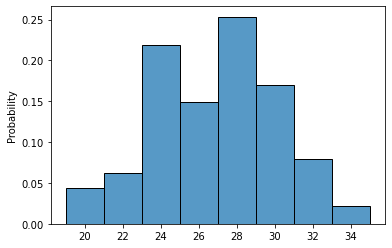

In [9]:
trials=10000
Activities=["A","B","C","D","E","F"]
Durations={}
Predecessors={"A":[],"B":["A"],"C":["B","D"],"D":["A"],"E":["D"],"F":["C","E"]}
Durations["A"]=np.random.choice([4,8,11],p=[0.4,0.4,0.2],size=trials)
Durations["B"]=np.random.choice([8,10,12],p=[0.4,0.2,0.4],size=trials)
Durations["C"]=np.random.choice([2,4],p=[0.5,0.5],size=trials)
Durations["D"]=np.random.choice([4,9],p=[0.8,0.2],size=trials)
Durations["E"]=np.random.choice([2,10],p=[0.5,0.5],size=trials)
Durations["F"]=np.ones(trials)*5

toBeProcessed=Activities.copy()
finishTimes={} #we have to compute those in the correct order, do multiple loops 
#only processing the ones that are ready to be processed

while(len(toBeProcessed)>0):
    for ac in Activities:
        if ac not in toBeProcessed:
            continue
        if len(set(Predecessors[ac]).intersection(set(toBeProcessed)))==0: #have processed pred
            print("processing",ac)
            startingTimes=np.zeros(trials)
            for predec in Predecessors[ac]:
                startingTimes=np.maximum(startingTimes,finishTimes[predec])
            finishTimes[ac]=startingTimes+Durations[ac]
            toBeProcessed.remove(ac)
        else :
            print ("failed to process",ac,Predecessors[ac],set(Predecessors[ac]).intersection(set(toBeProcessed)))
projectFinish=np.zeros(trials)
for ac in Activities:
    projectFinish=np.maximum(projectFinish,finishTimes[ac])
            
print("average time",projectFinish.mean())
print("probability to exheed 27",np.where(projectFinish>27,1,0).mean())
sn.histplot(projectFinish,stat="probability",bins=8)